In [1]:
import xml.etree.ElementTree as ET
import numpy as np
from svg.path import parse_path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tree = ET.parse('brain.svg')
root = tree.getroot()

svg = list(root.findall('*'))[-1]

In [13]:
resolution = 2
error = 1e-6
polygons = []
for p in list(svg.findall('{http://www.w3.org/2000/svg}path')):
    path = parse_path(p.get('d'))
    num_points = int(path.length(error=error)*resolution)
    points = [path.point(i/num_points, error=error) for i in range(num_points)]
    points = [np.array([point.real, point.imag]) for point in points]
    polygons.append(points)

In [33]:
def transform(point, origin, theta):
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
    return R.dot(np.array(point-origin))

In [70]:
def check_bounds(point, max_coord):
    return 0<point[0]<max_coord[0] and 0<point[1]<max_coord[1] 

In [77]:
def bound_box(polygons, Ox, Oy, theta, max_x, max_y):
    origin = np.array([Ox, Oy])
    max_coord = np.array([max_x, max_y])
    new_polygons = []
    for polygon in polygons:
        new_polygon = []
        for point in polygon+[[float('inf'), 0]]:
            p = transform(point, origin, theta)
            if check_bounds(p, max_coord):
                new_polygon.append(p)
            elif len(new_polygon) > 0:
                new_polygons.append(new_polygon)
                new_polygon = []
    return new_polygons

In [75]:
def scatter_my_ass(polygons):
    x_values = []
    y_values = []

    for polygon in polygons:
        x_values += [point[0] for point in polygon]
        y_values += [point[1] for point in polygon]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x_values, y_values, s=0.1)

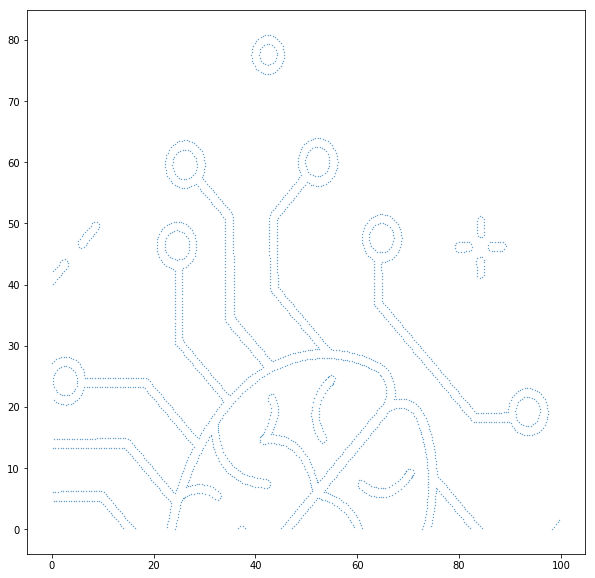

In [90]:
new_polygons = bound_box(polygons, 30, 30, 0.78, 100, 100)
scatter_my_ass(new_polygons)

In [69]:
new_polygons

[]